In [1]:
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
from rubin_sim.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib inline
import glob
import matplotlib.pylab as plt

In [2]:
dbfiles = glob.glob('baseline*nexp2*10yrs.db')
dbfiles.sort()

In [3]:
filename=dbfiles[0]
opsimdb = db.OpsimDatabase(dbfiles[0])
runname = filename.replace('_10yrs.db', '')
outDir = runname
resultsDb = db.ResultsDb(outDir=outDir)



In [5]:
bundleList = []


sql=''
metric = metrics.SeasonLengthMetric()
slicer = slicers.HealpixSlicer()

bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname))
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
# bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'fieldDec', 'fieldRA', 'visitExposureTime'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_SeasonLength_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


Plotting complete.


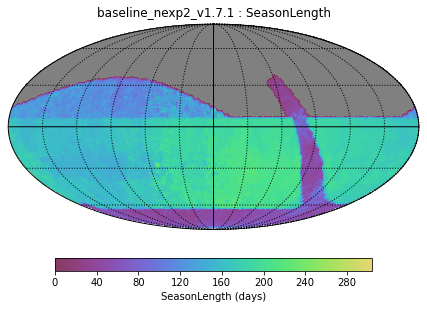

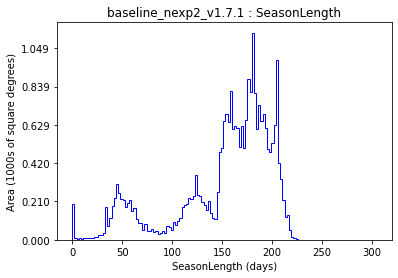

In [6]:
bgroup.plotAll(closefigs=False)


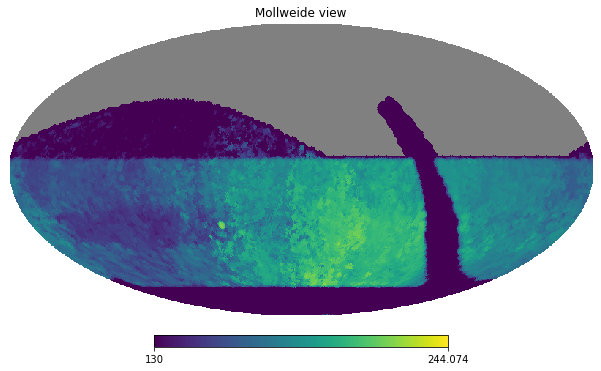

In [8]:
hp.mollview(bundleList[0].metricValues,min=130)